In [23]:
import torch
import matplotlib.pyplot as plt

In [24]:
weight=.6
bias=.4


start=0
end =1
step = 0.02
X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X+bias
X[:10],y[:10],len(X),len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.4000],
         [0.4120],
         [0.4240],
         [0.4360],
         [0.4480],
         [0.4600],
         [0.4720],
         [0.4840],
         [0.4960],
         [0.5080]]),
 50,
 50)

In [25]:
train_size = int(len(X)*0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]  
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [26]:
def plot_predictions(train_data=X_train,
                      train_labels=y_train,
                      test_data=X_test,
                      test_labels=y_test,
                      predictions=None):
    """Plots training data, test data and predictions if provided."""
    plt.figure(figsize=(10,6))
    plt.scatter(train_data, train_labels, c="black", s=6, label="Train data")
    plt.scatter(test_data, test_labels, c="g", s=6, label="Test data")
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=6, label="Predictions")

    plt.legend(prop={"size":15})
    

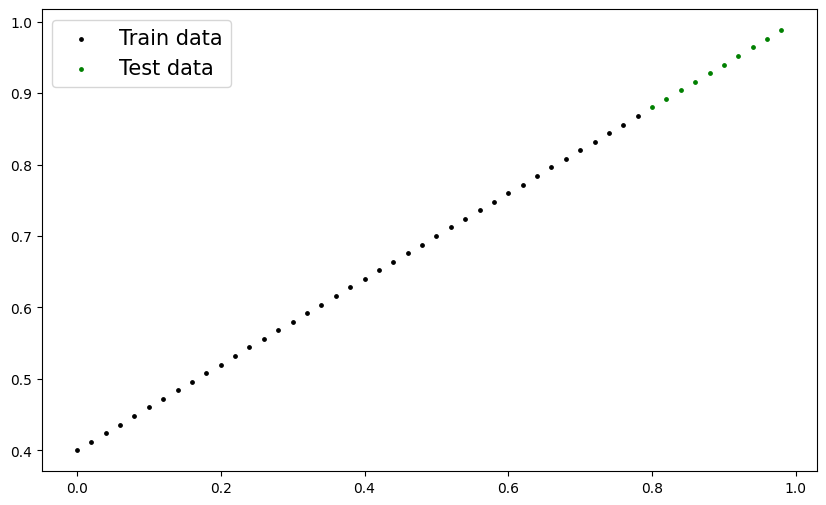

In [27]:
plot_predictions()

In [28]:
from torch import nn
class linearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights=nn.Parameter(torch.rand(1,
                                             requires_grad=True,
                                             dtype=torch.float))
        self.bias=nn.Parameter(torch.rand(1,
                                          requires_grad=True,
                                          dtype=torch.float))
    
    def forward(self,X:torch.Tensor)->torch.Tensor:
        return self.weights*X+self.bias

In [29]:
torch.manual_seed(42)
modelone=linearModel()

modelone.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [30]:
X_test,y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8800],
         [0.8920],
         [0.9040],
         [0.9160],
         [0.9280],
         [0.9400],
         [0.9520],
         [0.9640],
         [0.9760],
         [0.9880]]))

In [31]:
with torch.inference_mode():
    y_pred=modelone(X_test)
y_pred

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

In [32]:
def plotPred():
    plt.scatter(X_test,y_pred)

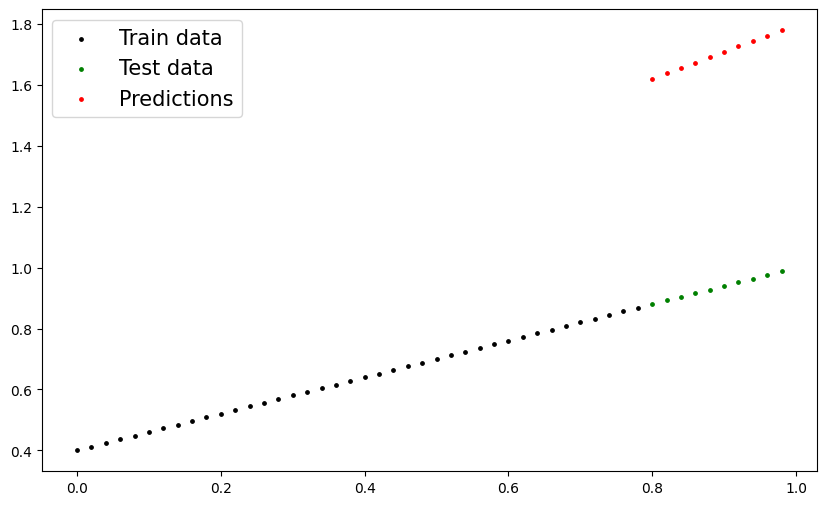

In [33]:
plot_predictions(predictions=y_pred)

In [34]:
modelone.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [35]:
loss_fn=nn.L1Loss()
optimizer_fn=torch.optim.SGD(params=modelone.parameters(),lr=0.001)

In [41]:
epochs = 600
filenames = []
for epoch in range(epochs):
    modelone.train()
    y_pred=modelone(X_train)
    loss=loss_fn(y_pred,y_train)
    optimizer_fn.zero_grad()
    loss.backward()
    optimizer_fn.step()
    modelone.eval()
    if epoch%10 == 0:
        with torch.inference_mode():

            y_pred_new=modelone(X_test)
        def plot_predictions_save(train_data=X_train,
                      train_labels=y_train,
                      test_data=X_test,
                      test_labels=y_test,
                      predictions=None):
            """Plots training data, test data and predictions if provided."""
            plt.figure(figsize=(10,6))
            plt.scatter(train_data, train_labels, c="black", s=6, label="Train data")
            plt.scatter(test_data, test_labels, c="g", s=6, label="Test data")
            if predictions is not None:
                plt.scatter(test_data, predictions, c="r", s=6, label="Predictions")

            plt.legend(prop={"size":15})
            filename = f"frames/frame_{epoch}.png"
            plt.savefig(filename)
            filenames.append(filename)
            plt.close()
        plot_predictions_save(predictions=y_pred_new)
    

print(loss)
test_loss=loss_fn(y_pred_new,y_test)
print(f"test loss: {test_loss}")
    

tensor(0.0004, grad_fn=<MeanBackward0>)
test loss: 0.00025672317133285105


In [42]:
with torch.inference_mode():

    y_pred_new=modelone(X_test)

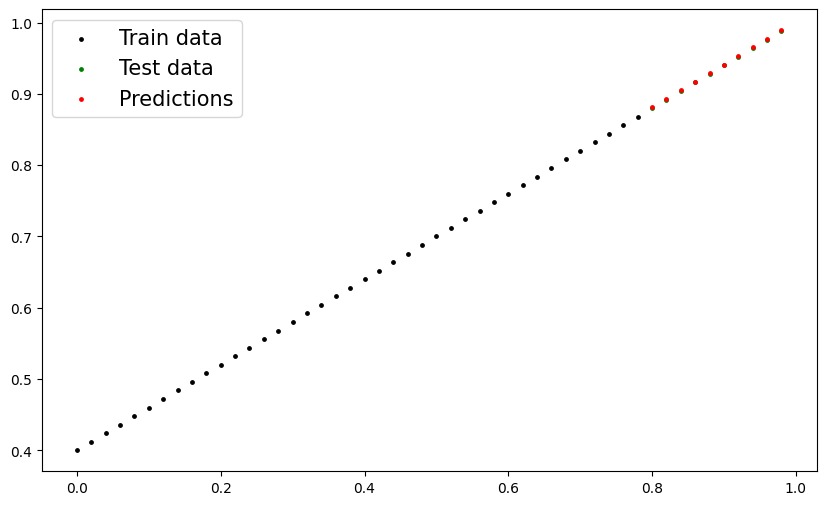

In [43]:
plot_predictions(predictions=y_pred_new)

In [44]:
import imageio
import os
with imageio.get_writer("training_scatter.gif", mode='I', duration=3,loop=0) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

/tmp/ipykernel_178671/1513895976.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


In [45]:
modelone.state_dict()

OrderedDict([('weights', tensor([0.6007])), ('bias', tensor([0.4005]))])

In [46]:
from pathlib import Path
model_path = Path("models")
model_path.mkdir(parents=True, exist_ok=True)
torch.save(modelone.state_dict(), model_path / "modelone.pth")

In [47]:
loaded_model = linearModel()
loaded_model.load_state_dict(torch.load(model_path / "modelone.pth"))
loaded_model.state_dict()  

OrderedDict([('weights', tensor([0.6007])), ('bias', tensor([0.4005]))])

In [48]:
y_pred_new== loaded_model(X_test)

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])